In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn import tree
#import pydotplus
import collections
from IPython.display import Image  
#import pydotplus
from sklearn.tree import export_graphviz

In [2]:
import copy

In [3]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_stata("Econ_484_data_final.dta")

In [5]:
# df.isin(["''"]).sum(axis=1).sum()

In [6]:
df = df.drop("DAYSWAIT_CHRON", axis=1)

In [7]:
df = df.dropna(axis=0, how='any')

In [8]:
df['year'] = pd.DatetimeIndex(df["TX_DATE"]).year
df['month'] = pd.DatetimeIndex(df["TX_DATE"]).month
df = df.drop("TX_DATE", axis=1)

### Making dummy variables

- gender
- abo{9}
- EXH_PERIT_ACCCESS{3}
- EXH_VASC_ACCESS{3}
- PREV_TX{2}
- PREV_KI_TX{2}
- MALIG_TRR{3}
- PERM_STATE_TRR{51}
- txkid{3}
- ABO_DON{9}
- DON_TY{3}
- GENDER_DON{2}
- HOME_STATE_DON{51}
- ABO_MAT{3}
- GRF_STAT_KI{2}
- DWFG_KI{2}
- TX_PROCEDUR_TY_KI{[did you get one or two? See data_sheet]}
- PRV_TX_ANY{2}
- PX_STAT{4}
- SHARE_TY{4}
- AGE_GROUP{2}
- malig{3} (previous malignancies)
- LT_ONE_WEEK_DON {2} (7 days old or less?)
- RECOV_OUT_US{2}

In [9]:
dummy_columns = ['gender', 'abo', 'EXH_PERIT_ACCESS', 'EXH_VASC_ACCESS', 'PREV_TX', 'PREV_KI_TX',
                 'MALIG_TRR', 'txkid', 'ABO_DON', 'DON_TY', 'GENDER_DON', 'DON_TY', 'GENDER_DON',
                 'HOME_STATE_DON', 'ABO_MAT', 'GRF_STAT_KI', 'DWFG_KI', 'PREV_TX_ANY', 'PX_STAT',
                 'SHARE_TY', 'AGE_GROUP', 'malig', 'LT_ONE_WEEK_DON', 'RECOV_OUT_US', 'year', 'month',
                 'PERM_STATE']
funky_columns = ['TX_PROCEDUR_TY_KI']

In [10]:
df_non_dummy = df.drop(dummy_columns, axis=1)
#df_non_dummy

In [11]:
df_dummified = pd.get_dummies(df[dummy_columns])


In [12]:
df = df_non_dummy.merge(df_dummified, left_index=True, right_index=True)


In [70]:
df_small = df.head(50)

In [71]:
econ_484_data = df_small.to_excel(r'C:\Users\jordan79\Desktop\export_dataframe.xlsx', index= None, header=True)

In [13]:
df.columns

Index(['NUM_PREV_TX', 'A1', 'A2', 'B1', 'B2', 'DR1', 'DR2', 'REM_CD',
       'END_STAT', 'INIT_AGE',
       ...
       'PERM_STATE_TX', 'PERM_STATE_UT', 'PERM_STATE_VA', 'PERM_STATE_VI',
       'PERM_STATE_VT', 'PERM_STATE_WA', 'PERM_STATE_WI', 'PERM_STATE_WV',
       'PERM_STATE_WY', 'PERM_STATE_ZZ'],
      dtype='object', length=221)

In [14]:
y_variable = 'DAYSWAIT_CHRON_KI'
X_variables = list(df.columns[df.columns != y_variable])
X = df[X_variables].to_numpy()
y = df[y_variable].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y)

forest = RandomForestRegressor(n_estimators=5)
model = forest.fit(X_train, y_train)

In [15]:
model.score(X_test,y_test)

0.8279539199267968

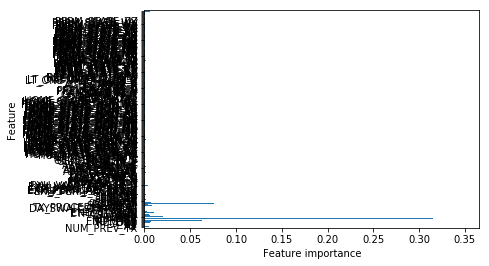

In [16]:
def plot_feature_importances_(model):
    n_features = X_test.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(model)

In [17]:
num_21 =  X[21,:].copy().reshape(1, -1)
num_21.shape


(1, 230)

In [18]:
num_21  = pd.DataFrame(num_21, columns = df[X_variables].columns)
num_21

,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,11.0,28.0,8.0,44.0,3.0,4.0,4.0,4010.0,43.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
num_21.iloc[0,221]

0.0

In [20]:
num_21_different_state = copy.deepcopy(num_21)
num_21_different_state

,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,11.0,28.0,8.0,44.0,3.0,4.0,4.0,4010.0,43.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:

num_21_different_state.iloc[0,220]=0
num_21_different_state.iloc[0,180]=1
num_21_different_state

,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,11.0,28.0,8.0,44.0,3.0,4.0,4.0,4010.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
num_21


,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,11.0,28.0,8.0,44.0,3.0,4.0,4.0,4010.0,43.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
num_21_different_state


,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,11.0,28.0,8.0,44.0,3.0,4.0,4.0,4010.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
num_21 = num_21.to_numpy()
num_21_different_state = num_21_different_state.to_numpy()

In [25]:
print(model.predict(num_21))
print(model.predict(num_21_different_state))

[175.4]
[175.4]


In [26]:
df[X_variables].columns

Index(['NUM_PREV_TX', 'A1', 'A2', 'B1', 'B2', 'DR1', 'DR2', 'REM_CD',
       'END_STAT', 'INIT_AGE',
       ...
       'PERM_STATE_TX', 'PERM_STATE_UT', 'PERM_STATE_VA', 'PERM_STATE_VI',
       'PERM_STATE_VT', 'PERM_STATE_WA', 'PERM_STATE_WI', 'PERM_STATE_WV',
       'PERM_STATE_WY', 'PERM_STATE_ZZ'],
      dtype='object', length=230)

In [108]:
ave_people = pd.read_excel('ave_person_2.xlsx', sheet_name= 'Sheet2')

In [109]:
ave_people= ave_people.drop("DAYSWAIT_CHRON_KI", axis=1)
ave_people

,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0,2,24,27,49,4,11,4,4010,47,...,0,0,0,0,0,0,0,0,0,0
1,0,2,24,35,50,7,11,4,4010,48,...,0,0,0,0,0,0,0,0,0,0
2,0,2,28,35,51,7,12,4,4010,47,...,0,0,0,0,0,0,0,0,0,0


In [110]:
num_0 = ave_people.iloc[0,:162].copy().to_numpy()
num_0

array([   0,    2,   24,   27,   49,    4,   11,    4, 4010,   47,    0,
          1,    5,   35,    0,   37,    1, 4010,   48, 1643,    0,  101,
          0, 2031,    3, 2006,    7,    0,    1,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    1,
          0,    0,    1,    0,    1,    0,    0,    1,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    1,    0,    0,    0,    1,    1,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    1,
          1,    0,    1,    0,    1,    0,    0,   

In [112]:
#num_21 =  X[21,:172].copy().reshape(1, -1)
List = []
for i in range(58):
    A = np.zeros((58,), dtype=int)
    A[i]=1
    num_1 = np.concatenate((num_0,A), axis = None).reshape(1,-1)
    List.append(model.predict(num_1))
    print(model.predict(num_1))

ValueError: Number of features of the model must match the input. Model n_features is 230 and input n_features is 220 

In [85]:
num_21 =  X[21,:].copy().reshape(1, -1)
num_21.shape

(1, 230)

In [54]:

#num_21 =  X[21,:172].copy().reshape(1, -1)
List = []
for i in range(58):
    A = np.zeros((58,), dtype=int)
    A[i]=1
    num_10000 = np.concatenate((X[18917,:172].copy(),A), axis = None).reshape(1,-1)
    List.append(model.predict(num_10000))
    print(model.predict(num_10000))
    

[163.]
[257.2]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[112.8]
[163.]
[163.]
[163.]
[163.]
[163.]
[191.6]
[163.]
[163.]
[163.]
[214.6]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[163.]
[673.4]
[163.]
[271.8]
[163.]
[163.]
[454.4]
[163.]
[454.2]
[126.6]
[213.6]
[156.]
[163.]
[163.]
[163.]
[269.8]
[329.4]
[163.]
[163.]
[163.]
[163.]
[228.6]
[195.6]
[163.]
[163.]
[1353.2]


In [35]:
state_names = ['AK','AL','AR','AS','AZ','CA','CO','CT','DC','DE','FL','GA',
               'GU','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME',
               'MI','MN','MO','MP','MS','MT','NA','NC','ND','NE','NH','NJ',
               'NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN',
               'TX','UT','VA','VI','VT','WA','WI','WV','WY','ZZ']


In [36]:
# Person 1
List = np.asarray(List)
#List.reshape(-1,1)

wl_times = pd.DataFrame()
wl_times['state']= state_names
wl_times['68592']= List


In [38]:
# Person 2
List = np.asarray(List)
wl_times['360018']=List


In [41]:
# Person 3
List = np.asarray(List)
wl_times['300328']=List

In [43]:
# Person 4
List = np.asarray(List)
wl_times['173781']=List

In [45]:
# Person 5
List = np.asarray(List)
wl_times['311525']=List

In [47]:
# Person 6
List = np.asarray(List)
wl_times['336194']=List

In [49]:
# Person 7
List = np.asarray(List)
wl_times['298122']=List

In [51]:
# Person 8
List = np.asarray(List)
wl_times['343924']=List

In [53]:
# Person 9
List = np.asarray(List)
wl_times['22757']=List

In [55]:
# Person 10
List = np.asarray(List)
wl_times['18917']=List

In [56]:
wl_times.describe()


,68592,360018,300328,173781,311525,336194,298122,343924,22757,18917
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,818.575862,76.665517,290.627586,955.441379,711.024138,1364.110345,96.865517,327.234483,210.320690,212.910345
std,85.616748,18.502855,9.365517,30.298764,20.536901,16.622419,13.589283,38.021954,93.719821,176.586662
min,534.800000,46.200000,247.600000,866.000000,606.800000,1330.400000,93.200000,310.200000,106.400000,112.800000
25%,809.000000,71.000000,291.200000,953.000000,711.800000,1363.000000,93.200000,318.800000,190.800000,163.000000
50%,809.000000,71.000000,291.200000,953.000000,711.800000,1363.000000,93.200000,318.800000,190.800000,163.000000
75%,809.000000,71.000000,291.200000,953.000000,711.800000,1363.000000,93.200000,318.800000,190.800000,163.000000
max,1112.000000,184.200000,336.600000,1159.600000,794.800000,1482.400000,174.800000,521.000000,688.800000,1353.200000


In [58]:
rand_people = [68592, 360018, 300328, 173781, 311525, 336194, 298122, 343924, 22757, 18917]
times = [748.,145.6,407.2,1070.4,684.2,1329.8,75.4,397.4,307.6, 334.2]
times = np.array(times).reshape(1,-1)
rand_people_wl_time  = pd.DataFrame(times, columns = rand_people)
rand_people_wl_time

,68592,360018,300328,173781,311525,336194,298122,343924,22757,18917
0,748.0,145.6,407.2,1070.4,684.2,1329.8,75.4,397.4,307.6,334.2


In [32]:
num_10000 = np.concatenate((X[10000,:179].copy(),np.zeros(51)), axis = None).reshape(1,-1)
num_10000.shape

(1, 230)

In [33]:
num_10000  = pd.DataFrame(num_10000, columns = df[X_variables].columns)
num_10000


,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,3.0,30.0,18.0,35.0,7.0,11.0,4.0,4010.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
num_3 =  X[300328,:].copy().reshape(1, -1)
num_3  = pd.DataFrame(num_3, columns = df[X_variables].columns)

num_4 =  X[173781,:].copy().reshape(1, -1)
num_4  = pd.DataFrame(num_4, columns = df[X_variables].columns)

num_8 =  X[343924,:].copy().reshape(1, -1)
num_8  = pd.DataFrame(num_8, columns = df[X_variables].columns)


In [66]:
frames = [num_3, num_4, num_8]
results = pd.concat(frames)

In [67]:
results

,NUM_PREV_TX,A1,A2,B1,B2,DR1,DR2,REM_CD,END_STAT,INIT_AGE,...,PERM_STATE_TX,PERM_STATE_UT,PERM_STATE_VA,PERM_STATE_VI,PERM_STATE_VT,PERM_STATE_WA,PERM_STATE_WI,PERM_STATE_WV,PERM_STATE_WY,PERM_STATE_ZZ
0,0.0,31.0,68.0,39.0,53.0,4.0,13.0,4.0,4010.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,2.0,28.0,7.0,44.0,11.0,15.0,4.0,4010.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,31.0,32.0,45.0,64.0,7.0,11.0,15.0,4010.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


AttributeError: 'DataFrame' object has no attribute 'to_array'